In [1]:
# Plan (using Trello, so we can also see where you are)
# Formulate question
# Find data - Need to use at least two datasets, one of which is collected through scraping or use of an API
# Clean data
# Exploratory/Descriptive Analysis 
# Build model
# does not need to be the focus of the project
# could just be used as a tool, or to get a better understanding of the factors driving a particular outcome
# Formulate conclusions / answers / propose further work
# Prepare presentation
# And practice this, maybe one-to-one
# Present

In [2]:
# female voice spectrum

In [3]:
import requests
from PIL import Image
from io import BytesIO

url = "https://www.projectrhea.org/rhea/images/3/37/File5.jpg"
response = requests.get(url)
img = Image.open(BytesIO(response.content))
img.show()


In [4]:
# male voice spectrum

In [5]:
import requests
from PIL import Image
from io import BytesIO

url = "https://www.projectrhea.org/rhea/images/c/ca/File6.jpg"
response = requests.get(url)
img = Image.open(BytesIO(response.content))
img.show()

In [6]:
# Insights and Information from Data
 # Formulate an interesting question
# Find data to help you answer that question 
# Clean
# Analyse
# understand the problem
# understand the data
# Model
# Present

In [7]:
# preparing datasets

In [8]:
# abbreviations
# Datasets contains 20 feature columns and 1 column for denoting the label. The 20 statistical features were extracted through the Frequency Spectrum Analysis using R programming Language. They are:
# 1) meanfreq - The mean frequency (in kHz) is a pitch measure, that assesses the center of the distribution of power across frequencies.
# 2) sd - The standard deviation of frequency is a statistical measure that describes a dataset’s dispersion relative to its mean and is calculated as the variance’s square root.
# 3) median - The median frequency (in kHz) is the middle number in the sorted, ascending, or descending list of numbers.
# 4) Q25 - The first quartile (in kHz), referred to as Q1, is the median of the lower half of the data set. This means that about 25 percent of the data set numbers are below Q1, and about 75 percent are above Q1.
# 5) Q75 - The third quartile (in kHz), referred to as Q3, is the central point between the median and the highest distributions.
# 6) IQR - The interquartile range (in kHz) is a measure of statistical dispersion, equal to the difference between
# 75th and 25th percentiles or between upper and lower quartiles.
# 7) skew - The skewness is the degree of distortion from the normal distribution. It measures the lack of symmetry in the data distribution.
# 8) kurt - The kurtosis is a statistical measure that determines how much the tails of distribution vary from the tails of a normal distribution. It is actually the measure of outliers present in the data distribution.
# 9) sp.ent - The spectral entropy is a measure of signal irregularity that sums up the normalized signal’s spectral power.
# 10) sfm - The spectral flatness or tonality coefficient, also known as Wiener entropy, is a measure used for 
# digital signal processing to characterize an audio spectrum. Spectral flatness is usually measured in decibels, which, instead of being noise-like, offers a way to calculate how tone-like a sound is.
# 11) mode - The mode frequency is the most frequently observed value in a data set.
# 12) centroid - The spectral centroid is a metric used to describe a spectrum in digital signal processing. It means where the spectrum’s center of mass is centered.
# 13) meanfun - The meanfun is the average of the fundamental frequency measured across the acoustic signal.
# 14) minfun - The minfun is the minimum fundamental frequency measured across the acoustic signal
# 15) maxfun - The maxfun is the maximum fundamental frequency measured across the acoustic signal.
# 16) meandom - The meandom is the average of dominant frequency measured across the acoustic signal.
# 17) mindom - The mindom is the minimum of dominant frequency measured across the acoustic signal.
# 18) maxdom - The maxdom is the maximum of dominant frequency measured across the acoustic signal
# 19) dfrange - The dfrange is the range of dominant frequency measured across the acoustic signal.
# 20) modindx - the modindx is the modulation index, which calculates the degree of frequency modulation expressed numerically as the ratio of the frequency deviation to the frequency of the modulating signal for a pure tone modulation.

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

import tensorflow as tf

In [10]:
data = pd.read_csv('voice.csv')

In [11]:
data

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3163,0.131884,0.084734,0.153707,0.049285,0.201144,0.151859,1.762129,6.630383,0.962934,0.763182,...,0.131884,0.182790,0.083770,0.262295,0.832899,0.007812,4.210938,4.203125,0.161929,female
3164,0.116221,0.089221,0.076758,0.042718,0.204911,0.162193,0.693730,2.503954,0.960716,0.709570,...,0.116221,0.188980,0.034409,0.275862,0.909856,0.039062,3.679688,3.640625,0.277897,female
3165,0.142056,0.095798,0.183731,0.033424,0.224360,0.190936,1.876502,6.604509,0.946854,0.654196,...,0.142056,0.209918,0.039506,0.275862,0.494271,0.007812,2.937500,2.929688,0.194759,female
3166,0.143659,0.090628,0.184976,0.043508,0.219943,0.176435,1.591065,5.388298,0.950436,0.675470,...,0.143659,0.172375,0.034483,0.250000,0.791360,0.007812,3.593750,3.585938,0.311002,female


In [12]:
data2 = pd.read_csv('cleaned_gender.csv')

In [13]:
data2

,Unnamed: 0,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,66,0.133338,0.069304,0.107668,0.089192,0.195267,0.106075,3.043456,13.694173,0.929512,...,0.133338,0.121968,0.047337,0.277457,0.822656,0.0000,4.687500,4.687500,0.076296,male
1,84,0.137433,0.058518,0.112037,0.092841,0.200079,0.107238,2.807995,12.776650,0.911080,...,0.137433,0.111204,0.047151,0.277457,1.313384,0.0000,6.046875,6.046875,0.135811,male
2,85,0.142227,0.065447,0.112242,0.093455,0.202909,0.109455,2.380899,9.942833,0.936040,...,0.142227,0.118711,0.047013,0.275862,0.593750,0.0000,6.539062,6.539062,0.096102,male
3,87,0.133325,0.072849,0.113360,0.082861,0.203753,0.120892,1.904123,7.799218,0.958362,...,0.133325,0.116200,0.047105,0.279070,0.424922,0.0000,5.812500,5.812500,0.081880,male
4,88,0.130487,0.070407,0.113418,0.076098,0.196188,0.120089,1.820873,8.561101,0.969568,...,0.130487,0.114802,0.047151,0.279070,0.198070,0.0000,1.078125,1.078125,0.131579,male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4356,6220,0.241377,0.039956,0.252299,0.225070,0.269297,0.044227,2.730197,11.467950,0.847220,...,0.241377,0.176361,0.047666,0.279070,1.224946,0.0000,6.140625,6.140625,0.093181,female
4357,6222,0.235059,0.053056,0.252532,0.231392,0.264468,0.033077,2.869390,12.009156,0.859784,...,0.235059,0.120552,0.047572,0.274286,1.103427,0.0000,10.382812,10.382812,0.056716,male
4358,6224,0.230992,0.053711,0.252760,0.223666,0.265731,0.042065,3.277391,15.202833,0.861995,...,0.230992,0.162745,0.047059,0.277457,1.297944,0.1875,11.812500,11.625000,0.081470,female
4359,6230,0.240334,0.044747,0.253897,0.233837,0.265619,0.031782,2.826720,11.350446,0.850527,...,0.240334,0.134127,0.046967,0.271186,0.528390,0.0000,3.187500,3.187500,0.065266,male


In [14]:
data2.drop("Unnamed: 0", axis=1, inplace=True)

In [15]:
data2

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.133338,0.069304,0.107668,0.089192,0.195267,0.106075,3.043456,13.694173,0.929512,0.627872,...,0.133338,0.121968,0.047337,0.277457,0.822656,0.0000,4.687500,4.687500,0.076296,male
1,0.137433,0.058518,0.112037,0.092841,0.200079,0.107238,2.807995,12.776650,0.911080,0.478175,...,0.137433,0.111204,0.047151,0.277457,1.313384,0.0000,6.046875,6.046875,0.135811,male
2,0.142227,0.065447,0.112242,0.093455,0.202909,0.109455,2.380899,9.942833,0.936040,0.557276,...,0.142227,0.118711,0.047013,0.275862,0.593750,0.0000,6.539062,6.539062,0.096102,male
3,0.133325,0.072849,0.113360,0.082861,0.203753,0.120892,1.904123,7.799218,0.958362,0.708279,...,0.133325,0.116200,0.047105,0.279070,0.424922,0.0000,5.812500,5.812500,0.081880,male
4,0.130487,0.070407,0.113418,0.076098,0.196188,0.120089,1.820873,8.561101,0.969568,0.778489,...,0.130487,0.114802,0.047151,0.279070,0.198070,0.0000,1.078125,1.078125,0.131579,male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4356,0.241377,0.039956,0.252299,0.225070,0.269297,0.044227,2.730197,11.467950,0.847220,0.183631,...,0.241377,0.176361,0.047666,0.279070,1.224946,0.0000,6.140625,6.140625,0.093181,female
4357,0.235059,0.053056,0.252532,0.231392,0.264468,0.033077,2.869390,12.009156,0.859784,0.304686,...,0.235059,0.120552,0.047572,0.274286,1.103427,0.0000,10.382812,10.382812,0.056716,male
4358,0.230992,0.053711,0.252760,0.223666,0.265731,0.042065,3.277391,15.202833,0.861995,0.314528,...,0.230992,0.162745,0.047059,0.277457,1.297944,0.1875,11.812500,11.625000,0.081470,female
4359,0.240334,0.044747,0.253897,0.233837,0.265619,0.031782,2.826720,11.350446,0.850527,0.230588,...,0.240334,0.134127,0.046967,0.271186,0.528390,0.0000,3.187500,3.187500,0.065266,male


In [16]:
cols = data.columns

In [17]:
list(cols)

['meanfreq',
 'sd',
 'median',
 'Q25',
 'Q75',
 'IQR',
 'skew',
 'kurt',
 'sp.ent',
 'sfm',
 'mode',
 'centroid',
 'meanfun',
 'minfun',
 'maxfun',
 'meandom',
 'mindom',
 'maxdom',
 'dfrange',
 'modindx',
 'label']

In [18]:
cols2 = data2.columns
list(cols2)

['meanfreq',
 'sd',
 'median',
 'Q25',
 'Q75',
 'IQR',
 'skew',
 'kurt',
 'sp.ent',
 'sfm',
 'mode',
 'centroid',
 'meanfun',
 'minfun',
 'maxfun',
 'meandom',
 'mindom',
 'maxdom',
 'dfrange',
 'modindx',
 'label']

In [19]:
concatenated_df = pd.concat([data, data2], axis=0)

In [20]:
# from matplotlib import pyplot as plt
# import seaborn as sns
# corr_matrix=concatenated_df.corr()
# plt.figure(figsize=(15,10))
# sns.heatmap(corr_matrix,
#            annot=True,
#            linewidths=0.5,
#            fmt=".2f")

In [21]:
concatenated_df

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4356,0.241377,0.039956,0.252299,0.225070,0.269297,0.044227,2.730197,11.467950,0.847220,0.183631,...,0.241377,0.176361,0.047666,0.279070,1.224946,0.000000,6.140625,6.140625,0.093181,female
4357,0.235059,0.053056,0.252532,0.231392,0.264468,0.033077,2.869390,12.009156,0.859784,0.304686,...,0.235059,0.120552,0.047572,0.274286,1.103427,0.000000,10.382812,10.382812,0.056716,male
4358,0.230992,0.053711,0.252760,0.223666,0.265731,0.042065,3.277391,15.202833,0.861995,0.314528,...,0.230992,0.162745,0.047059,0.277457,1.297944,0.187500,11.812500,11.625000,0.081470,female
4359,0.240334,0.044747,0.253897,0.233837,0.265619,0.031782,2.826720,11.350446,0.850527,0.230588,...,0.240334,0.134127,0.046967,0.271186,0.528390,0.000000,3.187500,3.187500,0.065266,male


In [22]:
data3 = concatenated_df
# renaming dataframe to data3

In [23]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7529 entries, 0 to 4360
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   meanfreq  7529 non-null   float64
 1   sd        7529 non-null   float64
 2   median    7529 non-null   float64
 3   Q25       7529 non-null   float64
 4   Q75       7529 non-null   float64
 5   IQR       7529 non-null   float64
 6   skew      7529 non-null   float64
 7   kurt      7529 non-null   float64
 8   sp.ent    7529 non-null   float64
 9   sfm       7529 non-null   float64
 10  mode      7529 non-null   float64
 11  centroid  7529 non-null   float64
 12  meanfun   7529 non-null   float64
 13  minfun    7529 non-null   float64
 14  maxfun    7529 non-null   float64
 15  meandom   7529 non-null   float64
 16  mindom    7529 non-null   float64
 17  maxdom    7529 non-null   float64
 18  dfrange   7529 non-null   float64
 19  modindx   7529 non-null   float64
 20  label     7529 non-null   obje

In [24]:
data3.shape

(7529, 21)

In [25]:
data3.isnull().sum()

meanfreq    0
sd          0
median      0
Q25         0
Q75         0
IQR         0
skew        0
kurt        0
sp.ent      0
sfm         0
mode        0
centroid    0
meanfun     0
minfun      0
maxfun      0
meandom     0
mindom      0
maxdom      0
dfrange     0
modindx     0
label       0
dtype: int64

In [119]:
data3 = data3.fillna(data3.mean())

In [26]:
# Ignore  the warnings
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

# data visualisation and manipulation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
import missingno as msno

#configure
# sets matplotlib to inline and displays graphs below the corressponding cell.
%matplotlib inline  
style.use('fivethirtyeight')
sns.set(style='whitegrid',color_codes=True)

#import the necessary modelling algos.
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import datasets
from sklearn.naive_bayes import GaussianNB

#model selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,roc_curve,roc_auc_score
from sklearn.model_selection import GridSearchCV
#preprocess.
from sklearn.preprocessing import MinMaxScaler,StandardScaler,LabelEncoder,OneHotEncoder
from sklearn.impute import SimpleImputer


In [120]:
data3

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
807,0.180360,0.053766,0.189474,0.141895,0.213474,0.071579,1.473165,4.899974,0.918149,0.395065,0.186526,0.132277,0.047013,0.279070,0.968568,0.023438,4.148438,4.125000,0.128314,1
809,0.176482,0.058527,0.184521,0.128199,0.210805,0.082605,1.750256,6.873995,0.922014,0.453263,0.195249,0.136086,0.047572,0.277457,0.701891,0.023438,5.906250,5.882812,0.099374,1
810,0.182517,0.060163,0.184045,0.130169,0.237528,0.107360,1.002362,4.070842,0.932693,0.400688,0.181292,0.115765,0.047198,0.275862,0.704963,0.023438,3.750000,3.726562,0.129979,1
811,0.173202,0.064381,0.182496,0.111310,0.217011,0.105701,1.539900,5.533414,0.933333,0.567318,0.180339,0.104842,0.047572,0.271186,0.881250,0.023438,6.632812,6.609375,0.146080,1
812,0.175609,0.054744,0.183706,0.135559,0.211753,0.076194,1.703629,6.538832,0.914107,0.422329,0.182304,0.111494,0.047105,0.272727,1.034255,0.023438,7.617188,7.593750,0.105593,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4355,0.231800,0.058922,0.251624,0.222497,0.268725,0.046228,2.915722,12.584040,0.869438,0.355473,0.279436,0.121687,0.048096,0.279070,0.914423,0.000000,11.250000,11.250000,0.053423,1
4356,0.241377,0.039956,0.252299,0.225070,0.269297,0.044227,2.730197,11.467950,0.847220,0.183631,0.270242,0.176361,0.047666,0.279070,1.224946,0.000000,6.140625,6.140625,0.093181,0
4357,0.235059,0.053056,0.252532,0.231392,0.264468,0.033077,2.869390,12.009156,0.859784,0.304686,0.254402,0.120552,0.047572,0.274286,1.103427,0.000000,10.382812,10.382812,0.056716,1
4359,0.240334,0.044747,0.253897,0.233837,0.265619,0.031782,2.826720,11.350446,0.850527,0.230588,0.264169,0.134127,0.046967,0.271186,0.528390,0.000000,3.187500,3.187500,0.065266,1


In [121]:
data3.head(10)


,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
807,0.180360,0.053766,0.189474,0.141895,0.213474,0.071579,1.473165,4.899974,0.918149,0.395065,0.186526,0.132277,0.047013,0.279070,0.968568,0.023438,4.148438,4.125000,0.128314,1
809,0.176482,0.058527,0.184521,0.128199,0.210805,0.082605,1.750256,6.873995,0.922014,0.453263,0.195249,0.136086,0.047572,0.277457,0.701891,0.023438,5.906250,5.882812,0.099374,1
810,0.182517,0.060163,0.184045,0.130169,0.237528,0.107360,1.002362,4.070842,0.932693,0.400688,0.181292,0.115765,0.047198,0.275862,0.704963,0.023438,3.750000,3.726562,0.129979,1
811,0.173202,0.064381,0.182496,0.111310,0.217011,0.105701,1.539900,5.533414,0.933333,0.567318,0.180339,0.104842,0.047572,0.271186,0.881250,0.023438,6.632812,6.609375,0.146080,1
812,0.175609,0.054744,0.183706,0.135559,0.211753,0.076194,1.703629,6.538832,0.914107,0.422329,0.182304,0.111494,0.047105,0.272727,1.034255,0.023438,7.617188,7.593750,0.105593,1
814,0.168763,0.065099,0.187957,0.118280,0.214624,0.096344,2.140769,9.898027,0.948945,0.636394,0.193118,0.123732,0.047384,0.279070,0.626674,0.023438,2.367188,2.343750,0.123889,1
815,0.184749,0.056475,0.196257,0.124844,0.226055,0.101211,1.781203,5.804307,0.900624,0.390230,0.223486,0.137278,0.047013,0.277457,0.788603,0.023438,4.945312,4.921875,0.126825,1
816,0.180792,0.054554,0.194854,0.133041,0.216550,0.083509,1.879483,7.808826,0.915947,0.376618,0.204269,0.121079,0.047666,0.279070,1.370313,0.023438,8.226562,8.203125,0.152481,1
818,0.178491,0.055165,0.193882,0.132171,0.211842,0.079671,2.571840,12.232831,0.911292,0.432742,0.198487,0.125876,0.047013,0.279070,1.067264,0.023438,6.796875,6.773438,0.116057,1
819,0.184012,0.063713,0.193985,0.124165,0.244010,0.119846,1.545898,4.978661,0.923034,0.490398,0.193625,0.123233,0.047431,0.277457,0.888822,0.023438,3.703125,3.679688,0.162082,1


In [122]:
# Exploratory Data Analysis (EDA)¶
# The Features and the 'Target' variable¶

In [123]:
data3.shape


(4493, 20)

In [124]:
data3.index

Int64Index([ 807,  809,  810,  811,  812,  814,  815,  816,  818,  819,
            ...
            4349, 4351, 4352, 4353, 4354, 4355, 4356, 4357, 4359, 4360],
           dtype='int64', length=4493)

In [125]:
data3.columns # give a short description of each feature.


Index(['meanfreq', 'sd', 'median', 'Q25', 'Q75', 'IQR', 'skew', 'kurt',
       'sp.ent', 'sfm', 'mode', 'meanfun', 'minfun', 'maxfun', 'meandom',
       'mindom', 'maxdom', 'dfrange', 'modindx', 'label'],
      dtype='object')

In [126]:
# #A short description as on 'Data' tab on kaggle is :
# meanfreq: mean frequency (in kHz)
# sd: standard deviation of frequency
# median: median frequency (in kHz)
# Q25: first quantile (in kHz)
# Q75: third quantile (in kHz)
# IQR: interquantile range (in kHz)
# skew: skewness (see note in specprop description)
# kurt: kurtosis (see note in specprop description)
# sp.ent: spectral entropy
# sfm: spectral flatness
# mode: mode frequency
# centroid: frequency centroid (see specprop)
# peakf: peak frequency (frequency with highest energy)
# meanfun: average of fundamental frequency measured across acoustic signal
# minfun: minimum fundamental frequency measured across acoustic signal
# maxfun: maximum fundamental frequency measured across acoustic signal
# meandom: average of dominant frequency measured across acoustic signal
# mindom: minimum of dominant frequency measured across acoustic signal
# maxdom: maximum of dominant frequency measured across acoustic signal
# dfrange: range of dominant frequency measured across acoustic signal
# modindx: modulation index. Calculated as the accumulated absolute difference between adjacent measurements of fundamental frequencies divided by the frequency range
# label: male or female
# Note that we have 7529 voice samples and for each of sample 20 different acoustic properties are recorded. Finally the 'label' column is the target variable which we have to predict which is the gender of the person.

In [127]:
# Missing Values Treatment¶
data3.isnull().any()   


meanfreq    False
sd          False
median      False
Q25         False
Q75         False
IQR         False
skew        False
kurt        False
sp.ent      False
sfm         False
mode        False
meanfun     False
minfun      False
maxfun      False
meandom     False
mindom      False
maxdom      False
dfrange     False
modindx     False
label       False
dtype: bool

<AxesSubplot:>

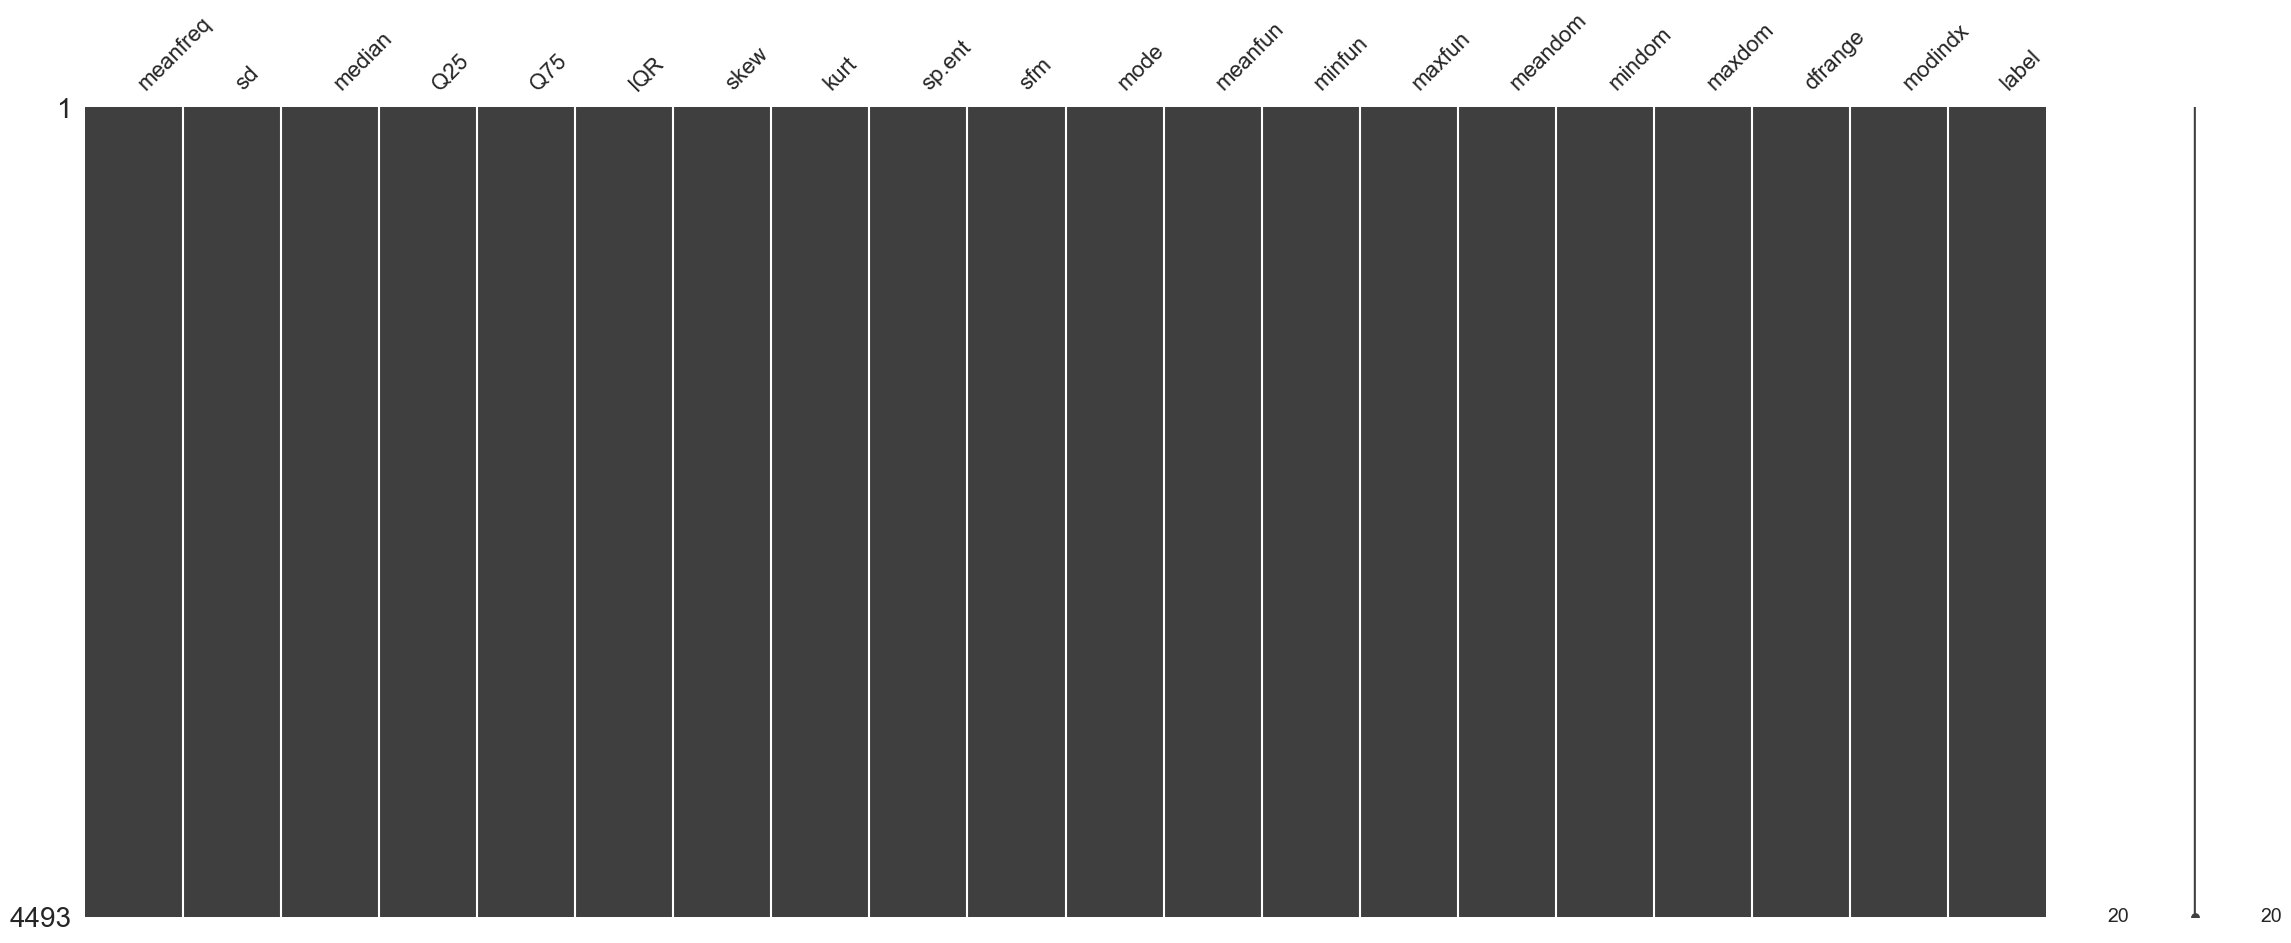

In [128]:
msno.matrix(data3)  # just to visualize. no missing value.

In [129]:
#  Univariate Analysis
# In this section I have performed the univariate analysis. Note that since all of the features are 'numeric' the most reasonable way to plot them would either be a 'histogram' or a 'boxplot'.
# Also note that univariate analysis is useful for outlier detection. Hence besides plotting a boxplot and a histogram for each column or feature, I have written a small utility function which tells the remaining no of observations for each feature if we remove its outliers.
# To detect the outliers I have used the standard 1.5 InterQuartileRange (IQR) rule which states that any observation lesser than 'first quartile - 1.5 IQR' or greater than 'third quartile +1.5 IQR' is an outlier.


In [130]:
data3.describe()


,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
count,4493.000000,4493.000000,4493.000000,4493.000000,4493.000000,4493.000000,4493.000000,4493.000000,4493.000000,4493.000000,4493.000000,4493.000000,4493.000000,4493.000000,4493.000000,4493.000000,4493.000000,4493.000000,4493.000000,4493.000000
mean,0.186592,0.056787,0.191161,0.145752,0.231297,0.085545,1.951092,7.787916,0.912910,0.433666,0.186687,0.132257,0.047358,0.277283,0.960526,0.004251,7.052679,7.048428,0.102975,0.749611
std,0.019582,0.009981,0.026381,0.031602,0.018235,0.028913,0.582148,3.317748,0.028308,0.126883,0.054229,0.018094,0.000416,0.002233,0.396862,0.009622,2.859647,2.859761,0.036810,0.433286
min,0.130253,0.029513,0.113360,0.057482,0.177122,0.020521,0.548743,2.293368,0.822643,0.101794,0.005933,0.093660,0.046921,0.271186,0.071470,0.000000,0.375000,0.375000,0.005507,0.000000
25%,0.173325,0.051011,0.172491,0.123238,0.219130,0.058923,1.518929,5.246844,0.895766,0.341804,0.137649,0.119362,0.047013,0.275862,0.658989,0.000000,5.109375,5.085938,0.075880,0.000000
50%,0.185911,0.058562,0.192950,0.139184,0.233139,0.094286,1.898983,7.012652,0.916665,0.431243,0.193907,0.127216,0.047244,0.277457,0.920759,0.000000,6.515625,6.515625,0.099598,1.000000
75%,0.199561,0.063270,0.211263,0.167870,0.245184,0.109382,2.353940,9.671991,0.933462,0.524621,0.228854,0.141660,0.047572,0.279070,1.216334,0.000000,9.046875,9.046875,0.127831,1.000000
max,0.241377,0.082745,0.257051,0.235086,0.270893,0.168567,3.600032,18.031429,0.973867,0.785258,0.280000,0.193873,0.048583,0.279070,2.079184,0.046875,14.976562,14.953125,0.205584,1.000000


In [131]:
def calc_limits(feature):
    q1,q3=data3[feature].quantile([0.25,0.75])
    iqr=q3-q1
    rang=1.5*iqr
    return(q1-rang,q3+rang)

In [132]:
def plot(feature):
    fig,axes=plt.subplots(1,2)
    sns.boxplot(data=data3,x=feature,ax=axes[0])
    sns.distplot(a=data3[feature],ax=axes[1],color='#ff4125')
    fig.set_size_inches(15,5)
    
    lower,upper = calc_limits(feature)
    l=[data3[feature] for i in data3[feature] if i>lower and i<upper] 
    print("Number of data points remaining if outliers removed : ",len(l))

Number of data points remaining if outliers removed :  4482


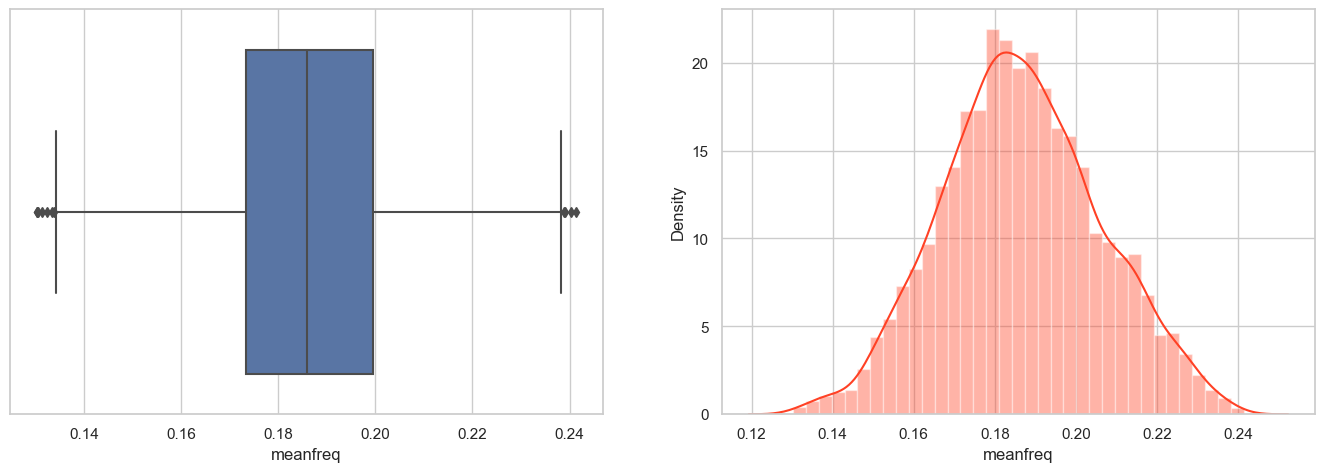

In [133]:
plot('meanfreq')

In [134]:
# INFERENCES FROM THE PLOT--¶
# 1) First of all note that the values are in compliance with that observed from describe method data frame..
# 2) Note that we have a couple of outliers w.r.t. to 1.5 quartile rule (reprsented by a 'dot' in the box plot).Removing these data points or outliers leaves us with around 3104 values.
# 3) Also note from the distplot that the distribution seems to be a bit -ve skewed hence we can normalize to make the distribution a bit more symmetric.
# 4) LASTLY NOTE THAT A LEFT TAIL DISTRIBUTION HAS MORE OUTLIERS ON THE SIDE BELOW TO Q1 AS EXPECTED AND A RIGHT TAIL HAS ABOVE THE Q3.

Number of data points remaining if outliers removed :  4455


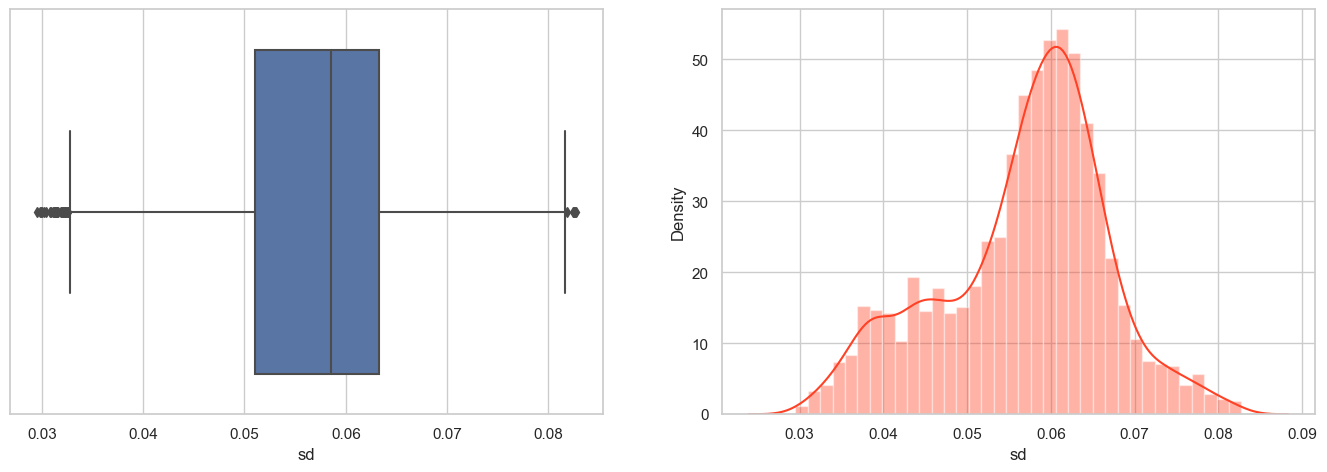

In [135]:
plot('sd')


Number of data points remaining if outliers removed :  4491


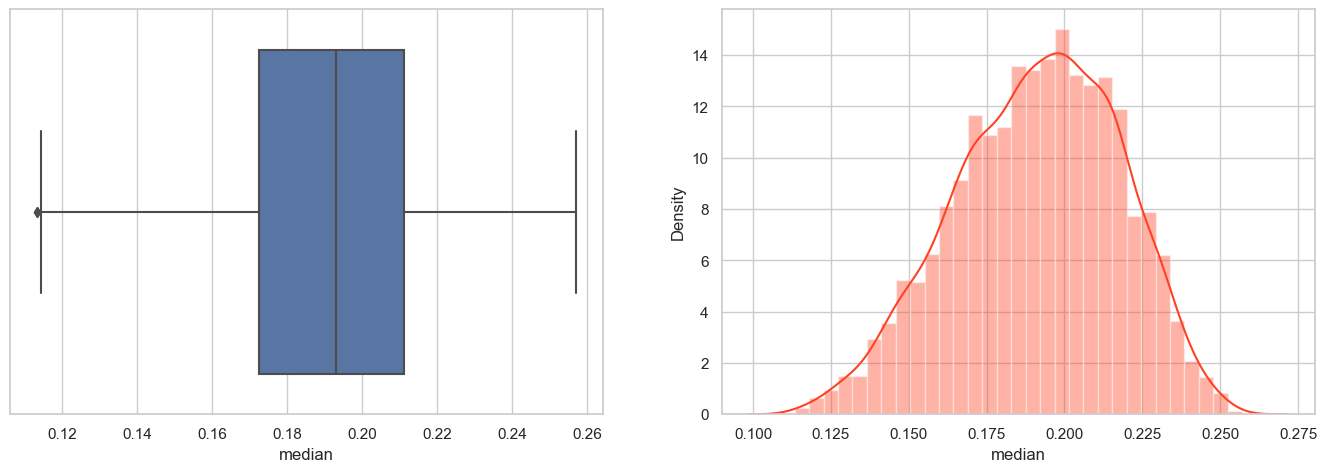

In [136]:
plot('median')


Number of data points remaining if outliers removed :  4492


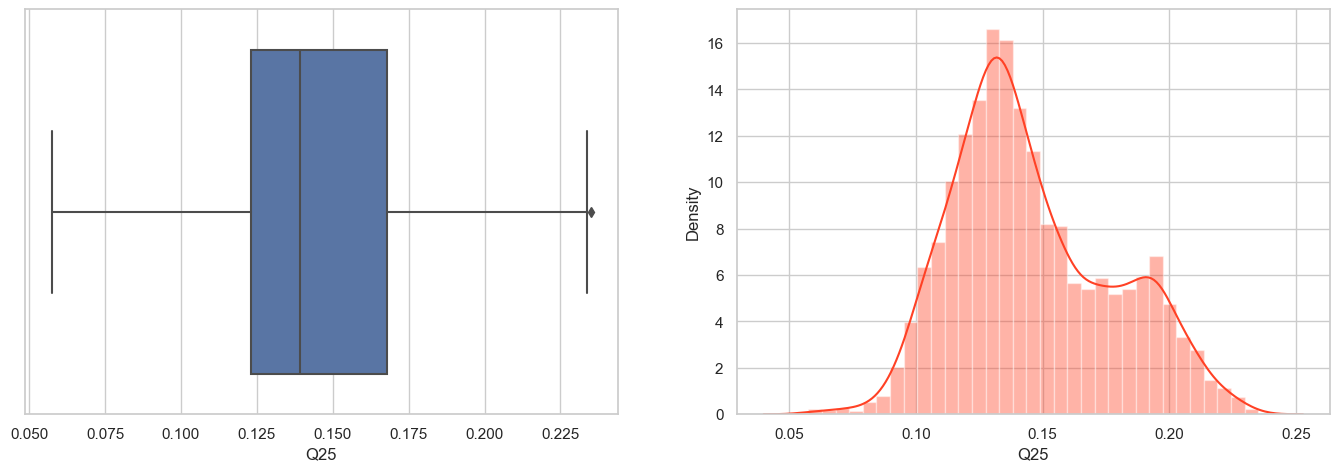

In [137]:
plot('Q25')


Number of data points remaining if outliers removed :  4493


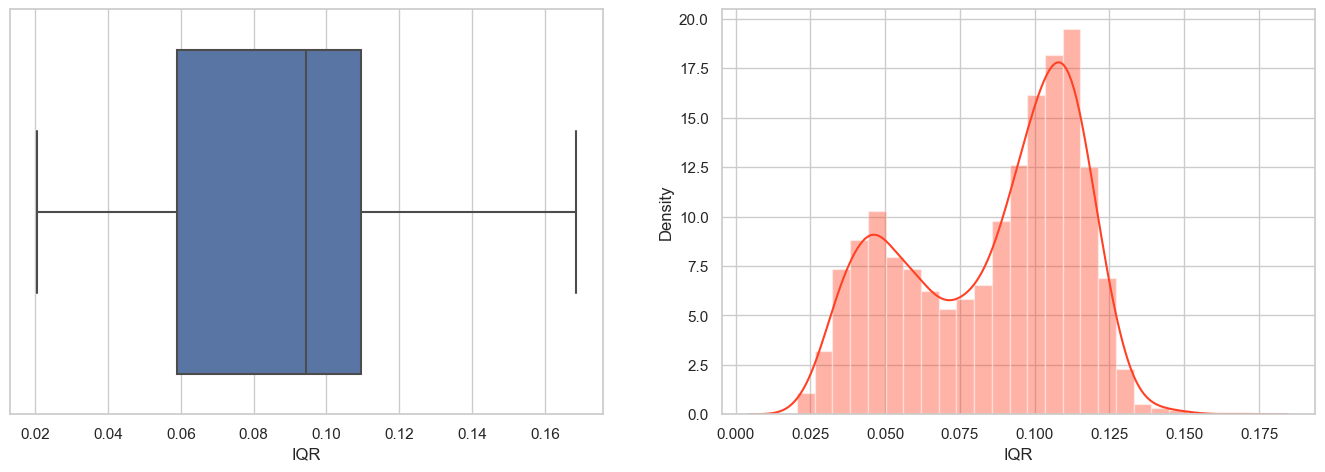

In [138]:
plot('IQR')


Number of data points remaining if outliers removed :  4493


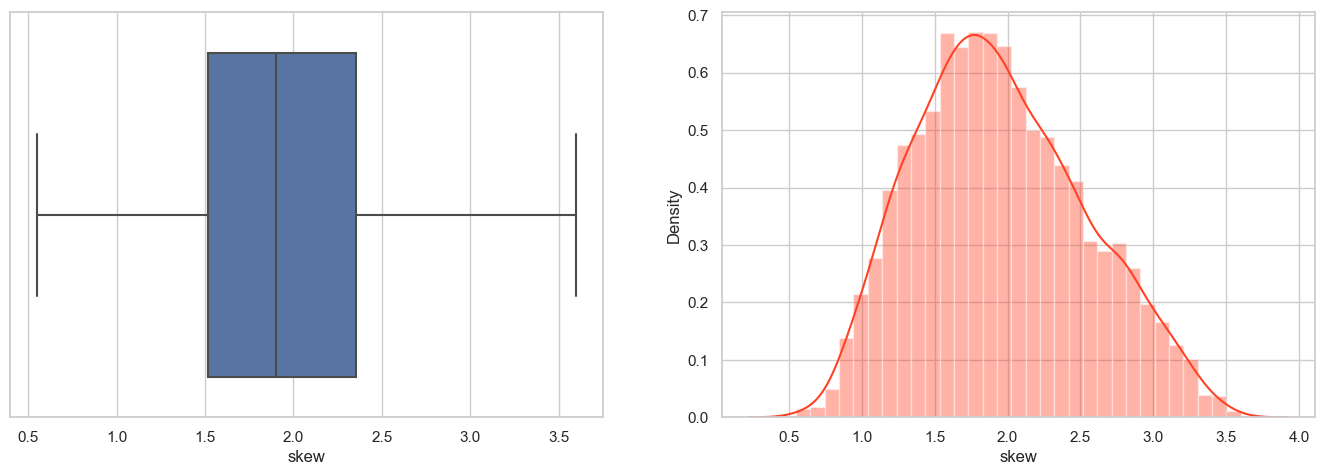

In [139]:
plot('skew')

Number of data points remaining if outliers removed :  4419


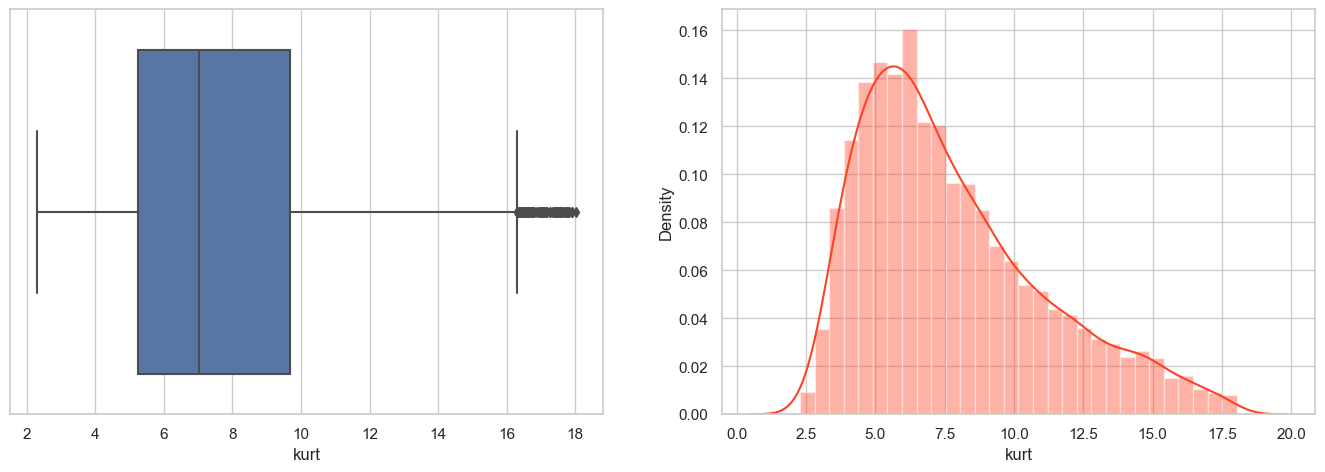

In [140]:
plot('kurt')


Number of data points remaining if outliers removed :  4447


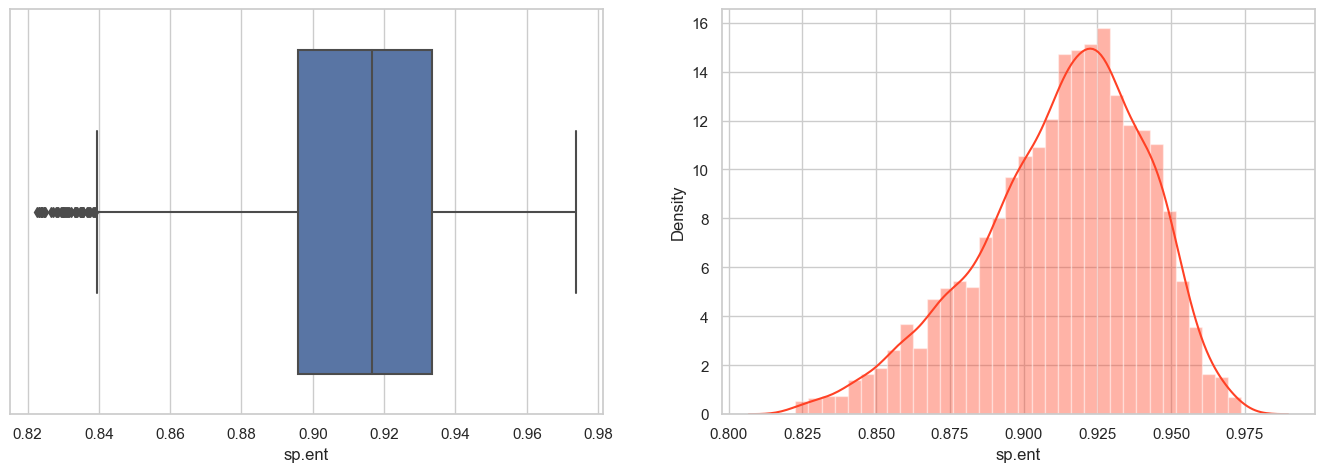

In [141]:
plot('sp.ent')


Number of data points remaining if outliers removed :  4493


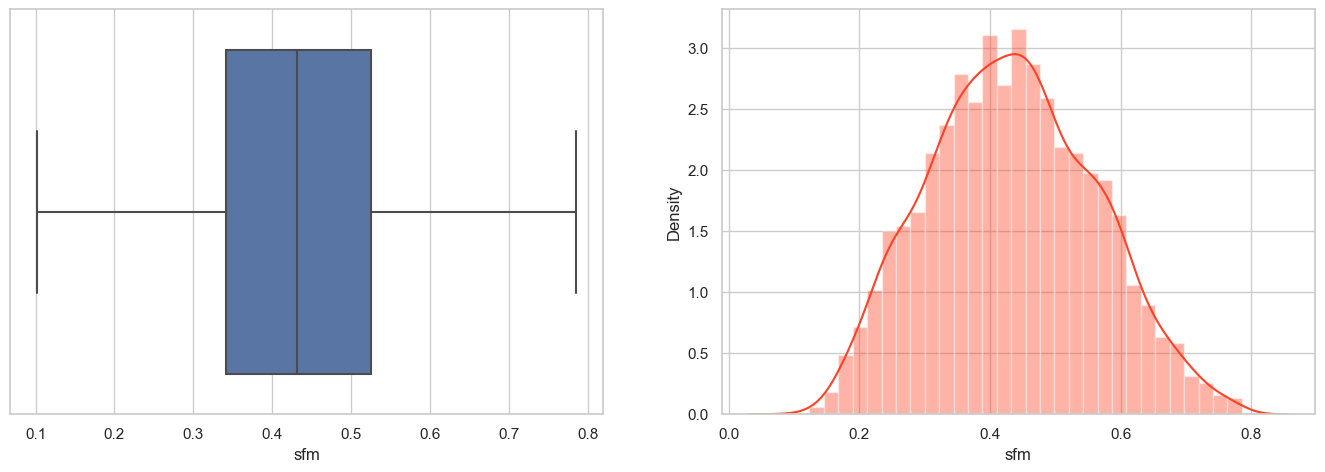

In [142]:
plot('sfm')


Number of data points remaining if outliers removed :  4388


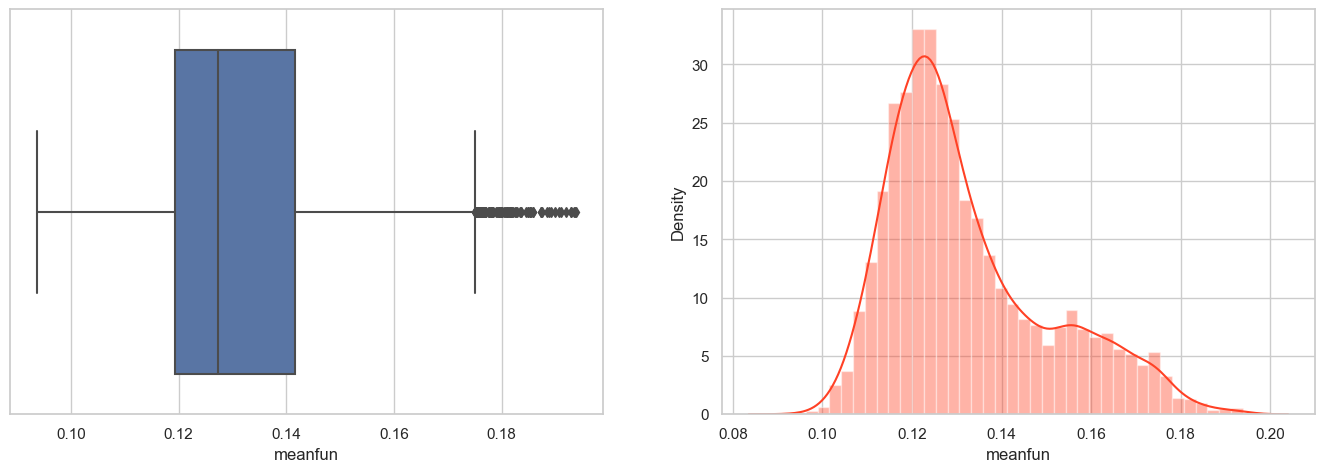

In [143]:
plot('meanfun')

<AxesSubplot:xlabel='label', ylabel='count'>

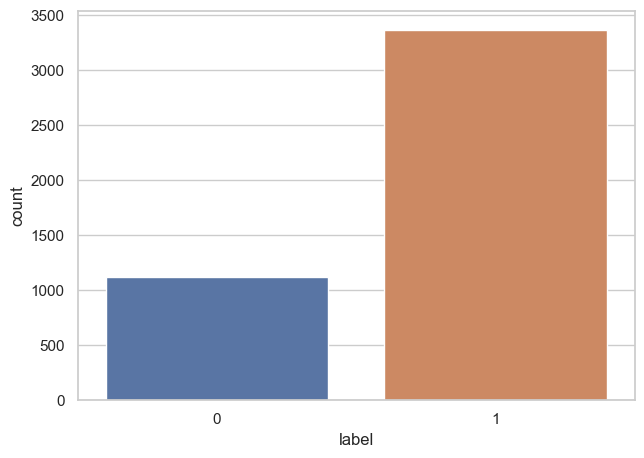

In [144]:
sns.countplot(data=data3,x='label')

In [145]:
data3['label'].value_counts()


1    3368
0    1125
Name: label, dtype: int64

In [146]:
# Note that we have equal no of observations for the 'males' and the 'females'. Hence it is a balanced class problem.

In [147]:
#  Corealtion b/w Features¶
# In this section I have analyzed the corelation between different features. To do it I have plotted a 'heat map' which clearly visulizes the corelation between different features.

In [148]:
temp = []
for i in data3.label:
    if i == 'male':
        temp.append(1)
    else:
        temp.append(0)
data3['label'] = temp

<AxesSubplot:>

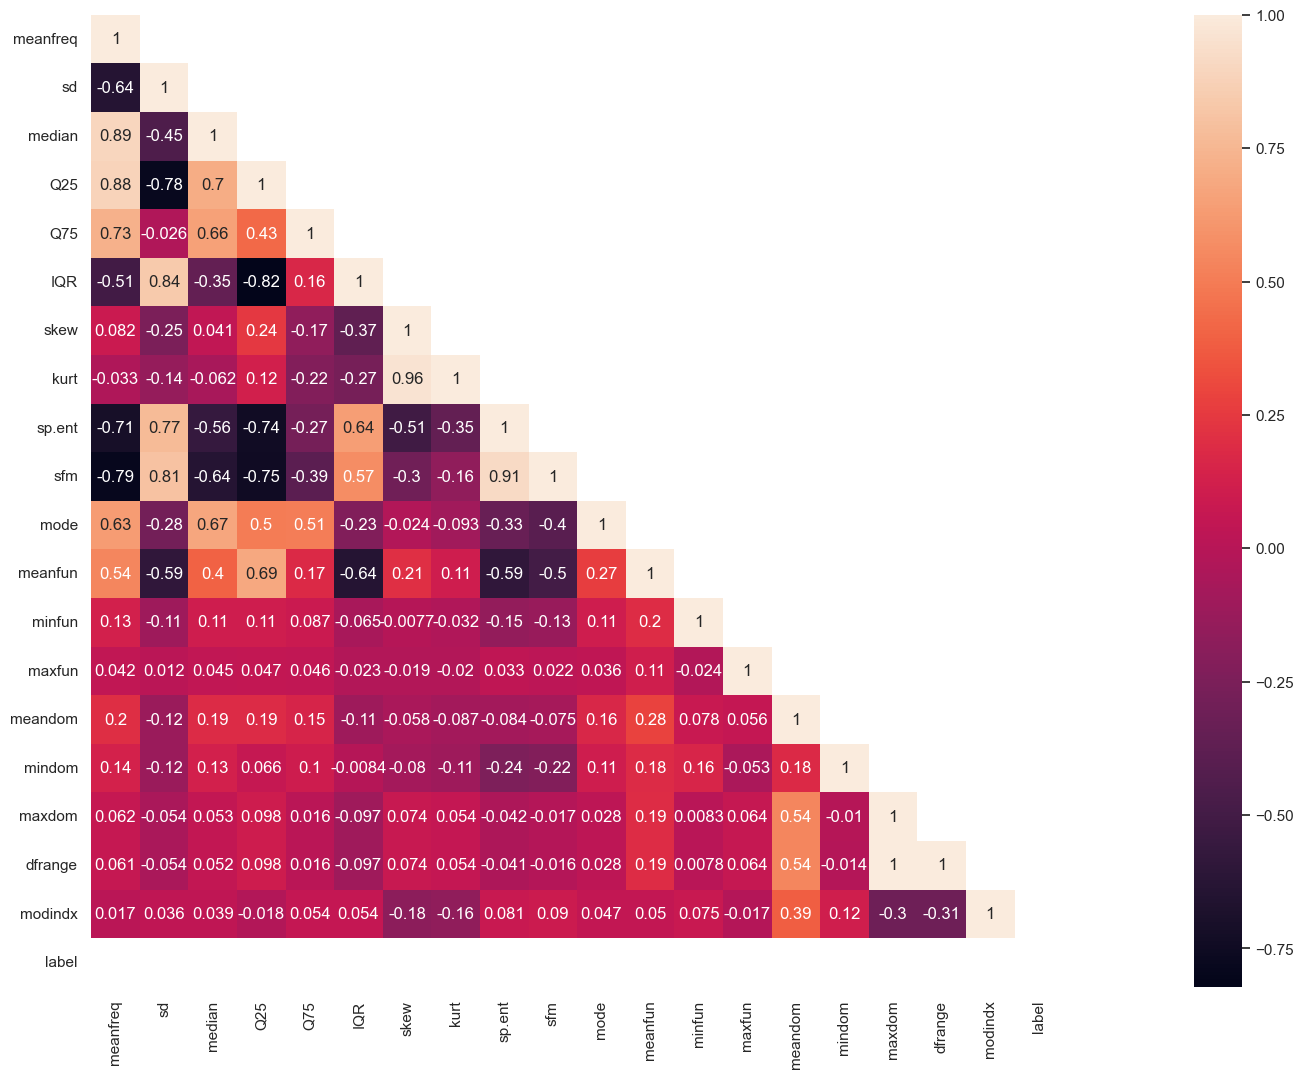

In [149]:
#corelation matrix.
cor_mat= data3[:].corr()
mask = np.array(cor_mat)
mask[np.tril_indices_from(mask)] = False
fig=plt.gcf()
fig.set_size_inches(30,12)
sns.heatmap(data=cor_mat,mask=mask,square=True,annot=True,cbar=True)

In [150]:
# CONCLUSIONS WITH SYNONYMS:
# The mean frequency and label show a moderate correlation.
# The label and IQR exhibit a strong positive correlation.
# The spectral entropy has a high correlation with the label, while the SFM has a moderate correlation.
# Skewness and kurtosis have a limited relationship with the label.
# Meanfun has a high negative correlation with the label.
# Centroid and median exhibit a high positive correlation, as expected based on their formulas.
# Note that meanfreq and centroid are the same feature as per their formulas and values, resulting in a perfect correlation of 1. Hence, one of these columns can be dropped. Centroid generally has a high degree of correlation with most other features. Therefore, the "Centroid" column will be dropped.
# SD has a high positive correlation with SFM, and SP.ent has a high correlation with SD.
# Kurt and skew have a high correlation.
# Meanfreq is highly correlated with median and Q25.
# IQR has a high correlation with SD.
# Finally, the self-correlation of a feature with itself is equal to 1, as expected.

In [151]:
data3.drop('centroid',axis=1,inplace=True)

KeyError: "['centroid'] not found in axis"

In [ ]:
# # Plotting the Features against the 'Target' variable
# Here I have just written a small utility function that plots the 'label' column vs the provided feature on a boxplot. In this way I have plotted some of the features against our target variable. This makes it easier to see the effect of the corressponding feature on the 'label'.

In [ ]:
# drawing features against the target variable.

def plot_against_target(feature):
    sns.factorplot(data=data3,y=feature,x='label',kind='box')
    fig=plt.gcf()
    fig.set_size_inches(7,7)

In [ ]:
plot_against_target('meanfreq') # 0 for females and 1 for males.


In [ ]:
# INFERENCES--
# 1) Firstly note that 0->'female' and 1->'male'.
# 2) Note that the boxpot depicts that the females in general have higher mean frequencies than their male counterparts and which is a generally accepted fact.

In [ ]:
# Again similar inferences can be drawn.

In [ ]:
plot_against_target('sd')

In [ ]:
plot_against_target('median')

In [ ]:
plot_against_target('Q25')

In [ ]:
plot_against_target('IQR')

In [ ]:
# Note here that there is a remarkable difference b/w the inter quartile ranges of males and females.This is evident from the strong relation between 'label' and the 'IQR' in the heatmap plotted above.¶


In [ ]:
plot_against_target('sfm')

In [ ]:
plot_against_target('meanfun')  

In [ ]:
# Again high difference in females and males mean fundamental frequency. 
#This is evident from the heat map which clearly shows the high corelation between meanfun and the 'label'.
# Now we move onto analyzing different features pairwise. Since all the features are continuous the most 
#reasonable way to do this is plotting the scatter plots for each feature pair. 
#I have also distinguished males and feamles on the same plot which makes it a 
#bit easier to compare the variation of features within the two classes.¶

In [ ]:
# Now we move onto analyzing different features pairwise. Since all the 
#features are continuous the most reasonable way to do this is plotting the 
#scatter plots for each feature pair. I have also distinguished males and #
# feamles on the same plot which makes it a bit easier to compare the variation of features within the two classes.

In [ ]:
g = sns.PairGrid(data3[['meanfreq','sd','median','Q25','IQR','sp.ent','sfm','meanfun','label']], hue = "label")
g = g.map(plt.scatter).add_legend()

In [ ]:
# Outlier Treatment¶


In [ ]:
# In this section I have dealt with the outliers. Note that we discovered the potential outliers in the 'univariate analysis' section. Now to remove those outliers we can either remove the corressponding data points or impute them with some other statistical quantity like median (robust to outliers) etc..

In [ ]:
# For now I shall be removing all the observations or data points which are outlier to 'any' feature. Note that this substantially reduces the dataset siz

In [ ]:
# removal of any data point which is an outlier for any fetaure.
for col in data3.columns:
    lower,upper=calc_limits(col)
    data3 = data3[(data3[col] >lower) & (data3[col]<upper)]

In [ ]:
data3.shape

In [ ]:
data3.head(10)

In [ ]:
# Feature Engineering.¶

In [ ]:
# Dropping the features

In [ ]:
# I have dropped some columns which according to my analysis proved to be less useful or redundant.

In [ ]:
temp_df=data3.copy()
temp_df.drop(['skew','kurt','mindom','maxdom'],axis=1,inplace=True) # only one of maxdom and dfrange.
temp_df.head(10)
#df.head(10)

In [ ]:
# Generating New Features:
# I have executed two modifications. Firstly, I have made the 'meanfreq', 'median', and 'mode' comply with the standard relation:
# Copy code
# 3Median = 2Mean + Mode
# To accomplish this, I have altered the values in the 'median' column as shown below. However, you have the option to adjust the values in any other column, for example, the 'meanfreq' column.

In [ ]:
temp_df['meanfreq']=temp_df['meanfreq'].apply(lambda x:x*2)
temp_df['median']=temp_df['meanfreq']+temp_df['mode']
temp_df['median']=temp_df['median'].apply(lambda x:x/3)

In [ ]:
temp_df.head(10) 


In [ ]:
sns.boxplot(data=temp_df,y='median',x='label') # seeing the new 'median' against the 'label'.

In [ ]:
# The second new feature which was added is a measurement of skewness, calculated using the Karl Pearson Coefficient. The coefficient is calculated as the difference between the mean and mode of the data, divided by the standard deviation. You may also want to try other coefficients and compare their results with the target variable, which is the 'label' column.

In [ ]:
temp_df['pear_skew']=temp_df['meanfreq']-temp_df['mode']
temp_df['pear_skew']=temp_df['pear_skew']/temp_df['sd']
temp_df.head(10)

In [ ]:
sns.boxplot(data=temp_df,y='pear_skew',x='label') # plotting new 'skewness' against the 'label'.

In [ ]:
#  Preparing the Data
# Normalizing the Features.

In [ ]:
scaler=StandardScaler()
scaled_df=scaler.fit_transform(temp_df.drop('label',axis=1))
X=scaled_df
Y = data3['label'].to_numpy()


In [ ]:
#  Splitting into Training and Validation sets.¶


In [ ]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.20,random_state=42)

In [ ]:
# Modelling
# LOGISTIC REGRESSSION

In [ ]:
clf_lr=LogisticRegression()
clf_lr.fit(x_train,y_train)
pred=clf_lr.predict(x_test)
print(accuracy_score(pred,y_test))

In [ ]:
# kNN

In [ ]:
clf_knn=KNeighborsClassifier()
clf_knn.fit(x_train,y_train)
pred=clf_knn.predict(x_test)
print(accuracy_score(pred,y_test))

In [ ]:
# Support Vector Machine (SVM)


In [ ]:
clf_svm=SVC()
clf_svm.fit(x_train,y_train)
pred=clf_svm.predict(x_test)
print(accuracy_score(pred,y_test))

In [ ]:
# DECISION TREE


In [ ]:
clf_dt=DecisionTreeClassifier()
clf_dt.fit(x_train,y_train)
pred=clf_dt.predict(x_test)
print(accuracy_score(pred,y_test))

In [ ]:
# RANDOM FOREST


In [ ]:
clf_rf=RandomForestClassifier()
clf_rf.fit(x_train,y_train)
pred=clf_rf.predict(x_test)
print(accuracy_score(pred,y_test))

In [ ]:
# GRADIENT BOOSTING


In [ ]:
clf_gb=GradientBoostingClassifier()
clf_gb.fit(x_train,y_train)
pred=clf_gb.predict(x_test)
print(accuracy_score(pred,y_test))

In [ ]:
# To compare the results of different modeling algorithms, you can create a DataFrame to store the results of each model, and then use a bar plot to visualize the comparison. This will give you a clear visual representation of the performance of each model and help you choose the best one for your task.

In [ ]:
models=[LogisticRegression(),LinearSVC(),SVC(kernel='rbf'),KNeighborsClassifier(),RandomForestClassifier(),
        DecisionTreeClassifier(),GradientBoostingClassifier(),GaussianNB()]
model_names=['LogisticRegression','LinearSVM','rbfSVM','KNearestNeighbors','RandomForestClassifier','DecisionTree',
             'GradientBoostingClassifier','GaussianNB']

acc=[]
d={}

for model in range(len(models)):
    clf=models[model]
    clf.fit(x_train,y_train)
    pred=clf.predict(x_test)
    acc.append(accuracy_score(pred,y_test))
     
d={'Modelling Algo':model_names,'Accuracy':acc}

In [ ]:
acc_frame=pd.DataFrame(d)
acc_frame

In [ ]:
sns.barplot(y='Modelling Algo',x='Accuracy',data=acc_frame)

In [ ]:
#Parameter Tuning with GridSearchCV

In [ ]:
params_dict={'C':[0.001,0.01,0.1,1,10,100],'gamma':[0.001,0.01,0.1,1,10,100],'kernel':['linear','rbf']}
clf=GridSearchCV(estimator=SVC(),param_grid=params_dict,scoring='accuracy',cv=10)
clf.fit(x_train,y_train)

In [ ]:
clf.best_score_

In [ ]:
clf.best_params_

In [ ]:
print(accuracy_score(clf.predict(x_test),y_test))


In [ ]:
print(precision_score(clf.predict(x_test),y_test))


In [ ]:
# In conclusion, the results show a remarkable accuracy of 97.1% when using SVM. However, with further optimization of parameters, an even higher accuracy of 99.1% can be attained. It is evident that by carefully adjusting the parameters of various algorithms, it is possible to achieve even higher accuracy in the future. These findings demonstrate the potential for continued improvement in the field.